In [15]:
import os
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

img_path = '/mnt/c/VScode/WS-Hub/WS-label2mask/img_320/Image1 - 001_0_0.jpg'
js = '/mnt/c/VScode/WS-Hub/WS-label2mask/js_320/Image1 - 001_0_0.json'
class_info = [
        {'label':'organic matter', 'type':'polygon', 'color':1},                    # polygon 多段线
        {'label':'organic pore', 'type':'polygon', 'color':2},
        {'label':'inorganic pore', 'type':'polygon', 'color':3}]

img_bgr = cv2.imread(img_path)
img_mask = np.zeros(img_bgr.shape[:2])

with open(js, 'r', encoding='utf-8') as f:
    labelme = json.load(f)
        
for one_class in class_info: # 按顺序遍历每一个类别
        for each in labelme['shapes']: # 遍历所有标注，找到属于当前类别的标注
            if each['label'] == one_class['label']:
                if one_class['type'] == 'polygon': # polygon 多段线标注                   
                    # 获取点的坐标
                    points = [np.array(each['points'], dtype=np.int32).reshape((-1, 1, 2))]
                    # 在空白图上画 mask（闭合区域）
                    img_mask = cv2.fillPoly(img_mask, points, color=one_class['color'])
                    
                elif one_class['type'] == 'line' or one_class['type'] == 'linestrip': # line 或者 linestrip 线段标注 
                    # 获取点的坐标
                    points = [np.array(each['points'], dtype=np.int32).reshape((-1, 1, 2))]
                    # 在空白图上画 mask（非闭合区域）
                    img_mask = cv2.polylines(img_mask, points, isClosed=False, color=one_class['color'], thickness=one_class['thickness']) 
                
                elif one_class['type'] == 'circle': # circle 圆形标注
                    points = np.array(each['points'], dtype=np.int32)
                    center_x, center_y = points[0][0], points[0][1] # 圆心点坐标
                    edge_x, edge_y = points[1][0], points[1][1]     # 圆周点坐标
                    radius = np.linalg.norm(np.array([center_x, center_y] - np.array([edge_x, edge_y]))).astype('uint32') # 半径
                    img_mask = cv2.circle(img_mask, (center_x, center_y), radius, one_class['color'], one_class['thickness'])
                
                else:
                    print('未知标注类型', one_class['type'])
cv2.imwrite('mask.png', img_mask)


# plt.imshow(img_mask)
# plt.show()

True

[[[100 100]]

 [[200 100]]

 [[200 200]]

 [[100 200]]]


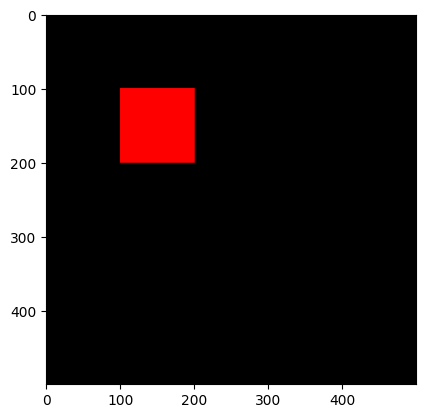

In [3]:
import cv2
import numpy as np

# 创建一个黑色的空白图像
img = np.zeros((500, 500, 3), dtype=np.uint8)

# 定义一个多边形的顶点
# 注意：顶点坐标必须是整数，因为它们代表像素位置
points = np.array([[100, 100], [200, 100], [200, 200], [100, 200]], dtype=np.int32).reshape((-1, 1, 2))

print(points)

# 定义颜色（BGR格式）
color = (255, 0, 0)  # 红色

# 填充多边形
mask = cv2.fillPoly(img, [points], color)

plt.imshow(mask)


[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1]
[0 1]


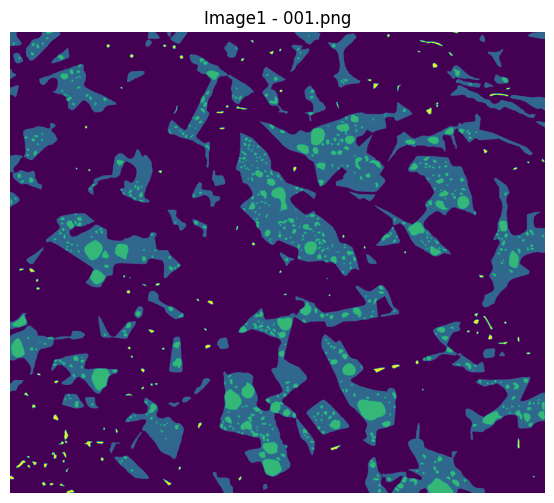

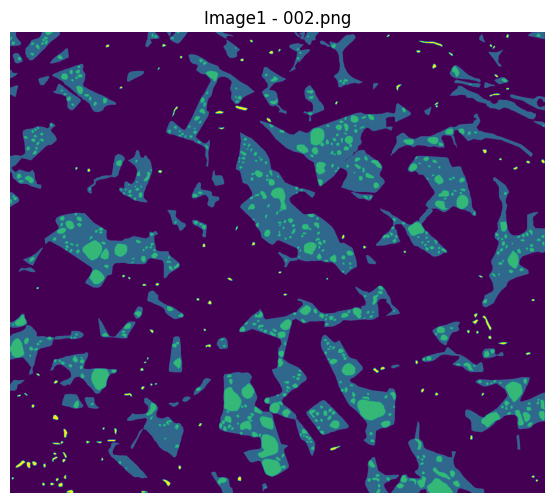

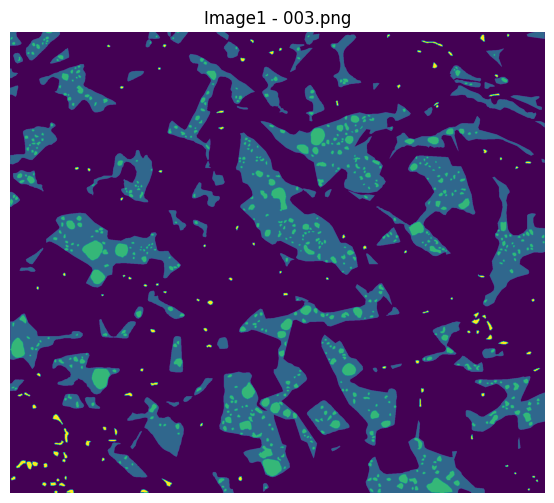

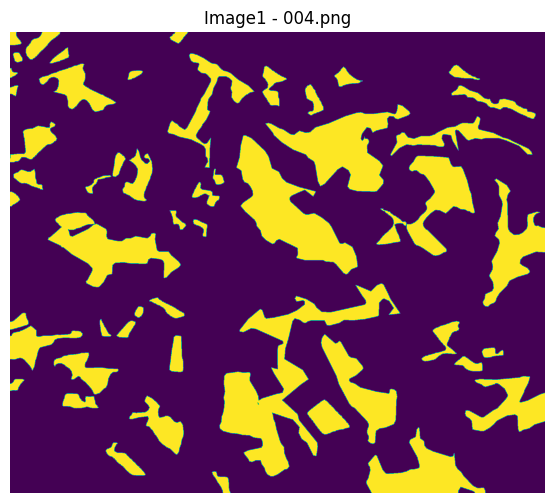

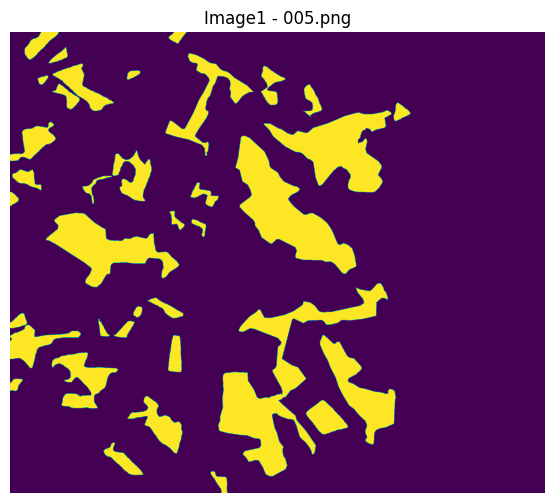

In [2]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt
path = "/mnt/c/VScode/WS-Hub/WS-label2mask/img_masks"
list = os.listdir(path)
for i, img in enumerate(list):

    mask = Image.open(os.path.join(path,img))
    mask = np.array(mask)
    print(np.unique(mask))
    plt.figure(figsize=(40,40))
    plt.subplot(1,5, i+1)
    plt.title(f'{img}')
    plt.imshow(mask)
    plt.axis('off')

[0 1 2]


(-0.5, 319.5, 319.5, -0.5)

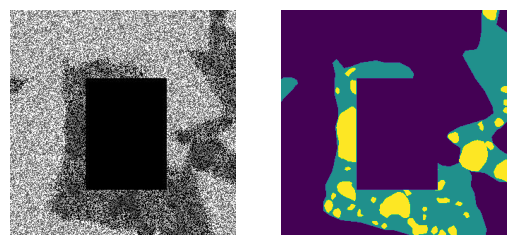

In [22]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt

path1 = '/mnt/c/VScode/WS-Hub/WS-label2mask/output/mask_2.png'
path2 = '/mnt/c/VScode/WS-Hub/WS-label2mask/output/image_2.jpg'

img = Image.open(path2)
img = np.array(img)
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

mask = Image.open(path1)
mask = np.array(mask)
print(np.unique(mask))
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.axis('off')

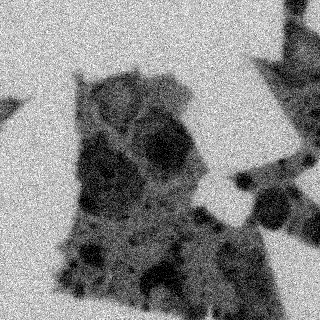

In [19]:
import numpy as np
from PIL import Image

def add_gaussian_noise(image):
    """
    Adds Gaussian noise to the image.
    """
    noise = np.random.normal(0, 25, image.shape)
    image = image + noise
    image = np.clip(image, 0, 255)
    return image.astype(np.uint8)

img = Image.open('/mnt/c/VScode/WS-Hub/WS-label2mask/now/img_output/Image1 - 001.jpeg_0.jpg')
img = np.array(img)
img = add_gaussian_noise(img)
img = Image.fromarray(img)
img.show()

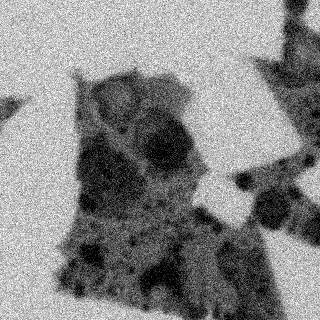

In [31]:
import numpy as np
from PIL import Image

def add_salt_and_pepper_noise(image):
    """
    Adds salt and pepper noise to the image.
    """
    noise = np.random.choice([0, 255], size=image.shape, p=[0.5, 0.5])
    image = image + noise
    image = np.clip(image, 0, 255)
    return image.astype(np.uint8)

img = Image.open('/mnt/c/VScode/WS-Hub/WS-label2mask/now/img_output/Image1 - 001.jpeg_0.jpg')
img = np.array(img)
img = add_gaussian_noise(img)
img = Image.fromarray(img)
img.show()